# Étude sur MNIST

In [95]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [200]:
!pip install adjustText

  Obtaining dependency information for adjustText from https://files.pythonhosted.org/packages/86/68/2514c33e8afcdfb41eef05580e3c8ddb0f7d1fde7fbc84c9d3bb43286d53/adjustText-1.0.4-py3-none-any.whl.metadata


In [96]:
from principal_DNN_MNIST import DNN
from utils import MnistDataloader
import numpy as np
import matplotlib.pyplot as plt
from os.path  import join
from adjustText import adjust_text

# 1 - Exemples de sorties

In [97]:
# Chargement des données 

input_path = '.'
training_images_filepath = join(input_path, 'MNIST/train-images.idx3-ubyte')
training_labels_filepath = join(input_path, 'MNIST/train-labels.idx1-ubyte')
test_images_filepath = join(input_path, 'MNIST/t10k-images.idx3-ubyte')
test_labels_filepath = join(input_path, 'MNIST/t10k-labels.idx1-ubyte')

mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

In [267]:
# Paramètres

p = [784, 200, 200, 10]
learning_rate = 0.001
len_batch = 10
n_epochs_backprop = 10
n_epochs_pretrain = 5

In [268]:
dnn = DNN(p) # Initialisation aléatoire du DNN
# Rétropropagation du DNN intialisé aléatoirement
losses = dnn.retropropagation(x_train, y_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_backprop)

Epoch 1/10, Erreur : 12.46 %, Loss: 1.171
Epoch 2/10, Erreur : 9.65 %, Loss: 0.379
Epoch 3/10, Erreur : 8.19 %, Loss: 0.311
Epoch 4/10, Erreur : 6.95 %, Loss: 0.265
Epoch 5/10, Erreur : 5.99 %, Loss: 0.226
Epoch 6/10, Erreur : 5.04 %, Loss: 0.194
Epoch 7/10, Erreur : 4.51 %, Loss: 0.169
Epoch 8/10, Erreur : 3.86 %, Loss: 0.149
Epoch 9/10, Erreur : 3.37 %, Loss: 0.132
Epoch 10/10, Erreur : 3.05 %, Loss: 0.118


In [269]:
erreur_train, y_hat_train = dnn.test(x_train, y_train)
erreur_test, y_hat_test = dnn.test(x_test, y_test)
print(f"Taux d'erreur sur le set d'entraînement : {round(erreur_train*100,2)} %")
print(f"Taux d'erreur sur le set de test : {round(erreur_test*100,2)} %")

Taux d'erreur sur le set d'entraînement : 3.05 %
Taux d'erreur sur le set de test : 3.86 %


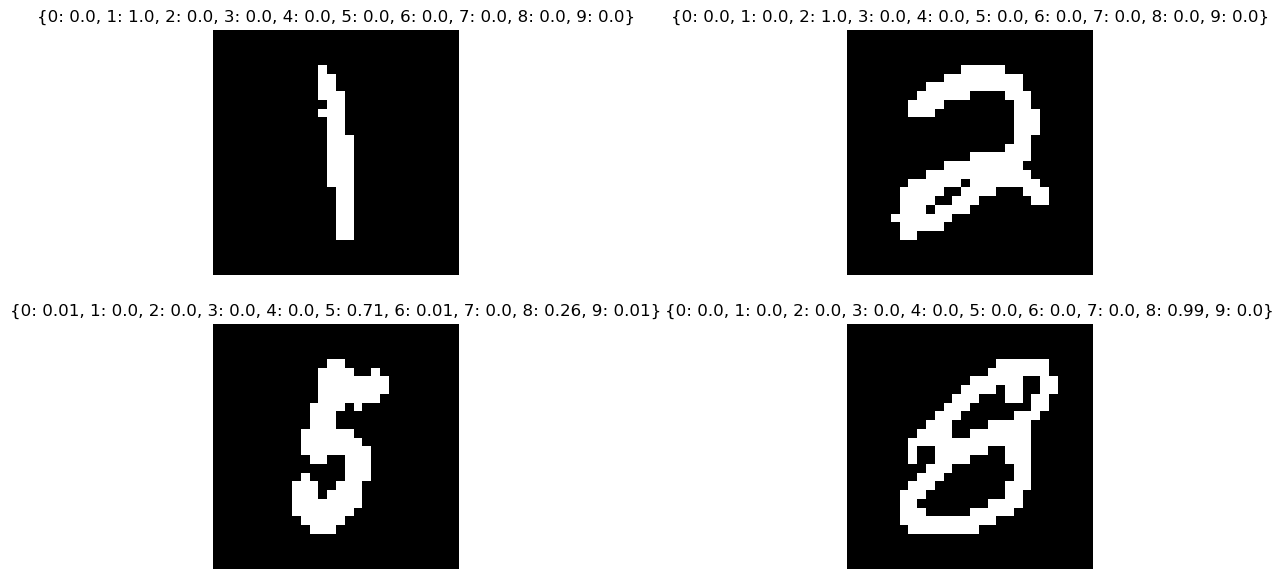

In [270]:
cols = 2
rows = 2
plt.figure(figsize=(15,7))
for k in range(4):
    i = np.random.choice(y_hat_test.shape[0])
    image = x_test[i].reshape(28,28)
    dico_hat = { k : round(y_hat_test[i][k],2) for k in range(10)}
    plt.subplot(rows, cols, k+1) 
    plt.title(dico_hat)     
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.savefig('figures/MNIST_sorties_scratch.jpg')
plt.show()

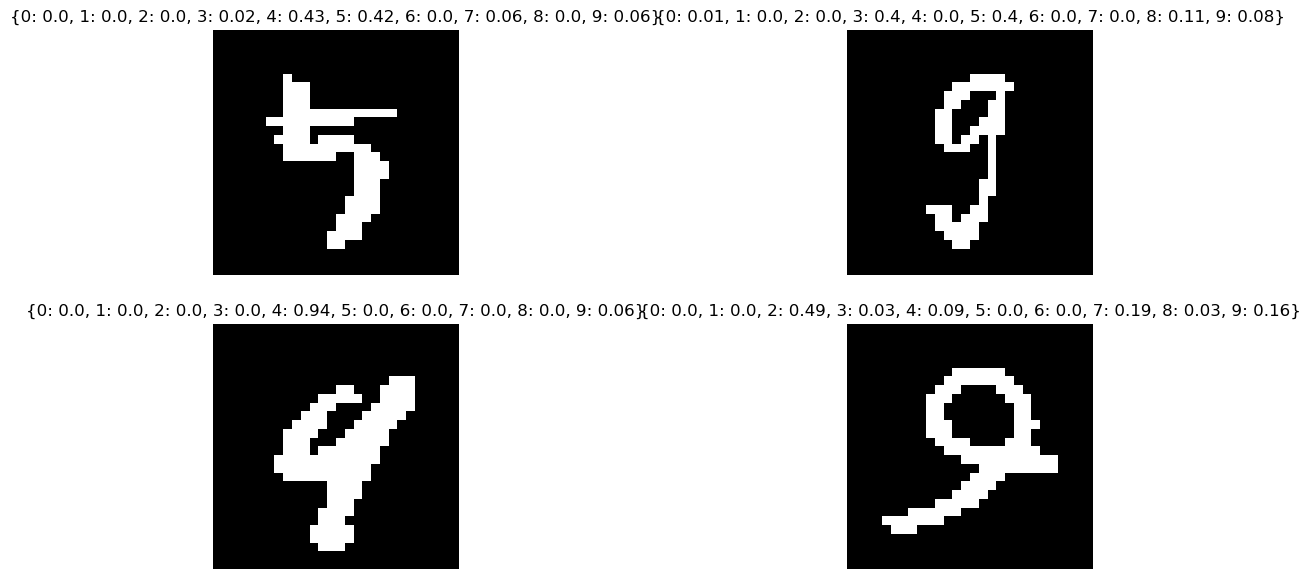

In [272]:
y_pred_test = np.argmax(y_hat_test, axis=1)
cols = 2
rows = 2
plt.figure(figsize=(15,7))
for k in range(4):
    i = np.random.choice(x_test[y_test != y_pred_test].shape[0])
    image = x_test[y_test != y_pred_test][i].reshape(28,28)
    dico_hat = {k : round(y_hat_test[y_test != y_pred_test][i][k],2) for k in range(10)}
    plt.subplot(rows, cols, k+1) 
    plt.title(dico_hat)     
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.savefig('figures/MNIST_sorties_scratch_wrong.jpg')
plt.show()

In [256]:
dnn_pr = DNN(p) # Initialisation aléatoire du DNN
# Pré-entraînement du DNN grâce au DBN
dnn_pr.pretrain(x_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_pretrain)

100%|██████████| 5/5 [00:49<00:00,  9.88s/it]


In [257]:
# Rétropropagation du DNN pré-entraîné
losses = dnn_pr.retropropagation(x_train, y_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_backprop)

Epoch 1/10, Erreur : 6.16 %, Loss: 0.35
Epoch 2/10, Erreur : 4.67 %, Loss: 0.18
Epoch 3/10, Erreur : 3.57 %, Loss: 0.142
Epoch 4/10, Erreur : 3.2 %, Loss: 0.118
Epoch 5/10, Erreur : 2.77 %, Loss: 0.102
Epoch 6/10, Erreur : 2.46 %, Loss: 0.09
Epoch 7/10, Erreur : 2.19 %, Loss: 0.082
Epoch 8/10, Erreur : 2.17 %, Loss: 0.074
Epoch 9/10, Erreur : 1.84 %, Loss: 0.069
Epoch 10/10, Erreur : 1.77 %, Loss: 0.063


In [258]:
erreur_train, y_hat_train = dnn_pr.test(x_train, y_train)
erreur_test, y_hat_test = dnn_pr.test(x_test, y_test)
print(f"Taux d'erreur sur le set d'entraînement : {round(erreur_train*100,2)} %")
print(f"Taux d'erreur sur le set de test : {round(erreur_test*100,2)} %")

Taux d'erreur sur le set d'entraînement : 1.77 %
Taux d'erreur sur le set de test : 2.43 %


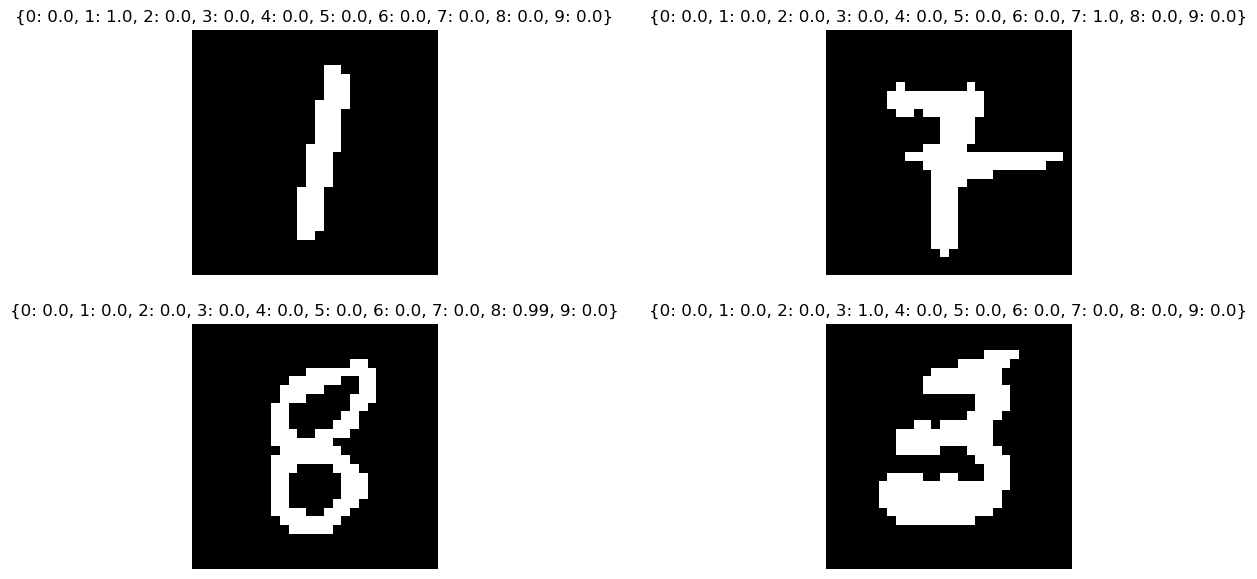

In [265]:
cols = 2
rows = 2
plt.figure(figsize=(15,7))
for k in range(4):
    i = np.random.choice(y_hat_test.shape[0])
    image = x_test[i].reshape(28,28)
    dico_hat = { k : round(y_hat_test[i][k],2) for k in range(10)}
    plt.subplot(rows, cols, k+1) 
    plt.title(dico_hat)     
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.savefig('figures/MNIST_sorties_pre.jpg')
plt.show()

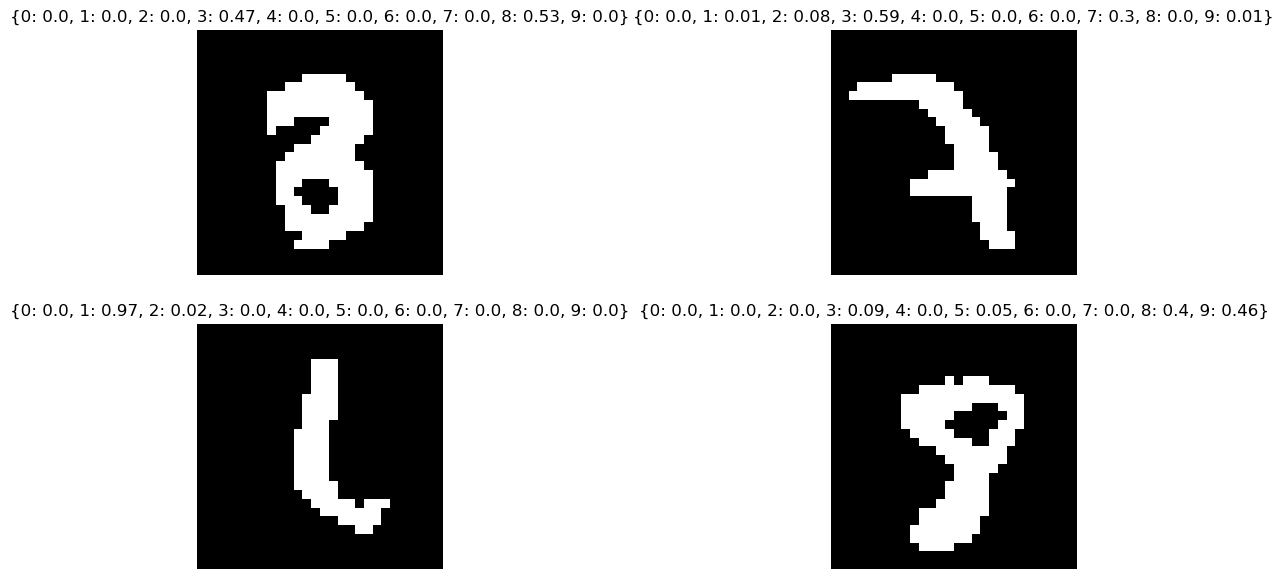

In [266]:
y_pred_test = np.argmax(y_hat_test, axis=1)
cols = 2
rows = 2
plt.figure(figsize=(15,7))
for k in range(4):
    i = np.random.choice(x_test[y_test != y_pred_test].shape[0])
    image = x_test[y_test != y_pred_test][i].reshape(28,28)
    dico_hat = {k : round(y_hat_test[y_test != y_pred_test][i][k],2) for k in range(10)}
    plt.subplot(rows, cols, k+1) 
    plt.title(dico_hat)     
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.savefig('figures/MNIST_sorties_pre_wrong.jpg')
plt.show()

# 2 - Analyse

## 2.1 - En fonction du nombre de couches

In [179]:
# Paramètres

nombre_couches = [0,1,2,3,4,5]
P = [[784] + [200 for k in range(n)] + [10] for n in nombre_couches]

learning_rate = 0.001
len_batch = 10
n_epochs_backprop = 10
n_epochs_pretrain = 5


In [190]:
train_erreurs_0 = []
test_erreurs_0 = []
c = 0
for p in P:

    print(f"Réseau à {c} couches")
    c += 1

    # Initialisation aléatoire du DNN
    dnn = DNN(p)
    
    # Rétropropagation du DNN intialisé aléatoirement
    losses = dnn.retropropagation(x_train, y_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_backprop)

    erreur_train, _ = dnn.test(x_train, y_train)
    erreur_test, _ = dnn.test(x_test, y_test)

    train_erreurs_0.append(erreur_train*100)
    test_erreurs_0.append(erreur_test*100)

Réseau à 0 couches
Epoch 1/10, Erreur : 31.87 %, Loss: 2.268
Epoch 2/10, Erreur : 29.14 %, Loss: 2.203
Epoch 3/10, Erreur : 28.01 %, Loss: 2.141
Epoch 4/10, Erreur : 27.18 %, Loss: 2.083
Epoch 5/10, Erreur : 26.49 %, Loss: 2.027
Epoch 6/10, Erreur : 25.94 %, Loss: 1.973
Epoch 7/10, Erreur : 25.58 %, Loss: 1.923
Epoch 8/10, Erreur : 25.12 %, Loss: 1.874
Epoch 9/10, Erreur : 24.79 %, Loss: 1.828
Epoch 10/10, Erreur : 24.4 %, Loss: 1.784
Réseau à 1 couches
Epoch 1/10, Erreur : 26.89 %, Loss: 1.963
Epoch 2/10, Erreur : 15.69 %, Loss: 0.875
Epoch 3/10, Erreur : 12.95 %, Loss: 0.549
Epoch 4/10, Erreur : 11.63 %, Loss: 0.452
Epoch 5/10, Erreur : 10.81 %, Loss: 0.406
Epoch 6/10, Erreur : 10.49 %, Loss: 0.38
Epoch 7/10, Erreur : 10.03 %, Loss: 0.362
Epoch 8/10, Erreur : 9.77 %, Loss: 0.348
Epoch 9/10, Erreur : 9.5 %, Loss: 0.338
Epoch 10/10, Erreur : 9.23 %, Loss: 0.328
Réseau à 2 couches
Epoch 1/10, Erreur : 12.52 %, Loss: 1.157
Epoch 2/10, Erreur : 9.35 %, Loss: 0.371
Epoch 3/10, Erreur : 8.0

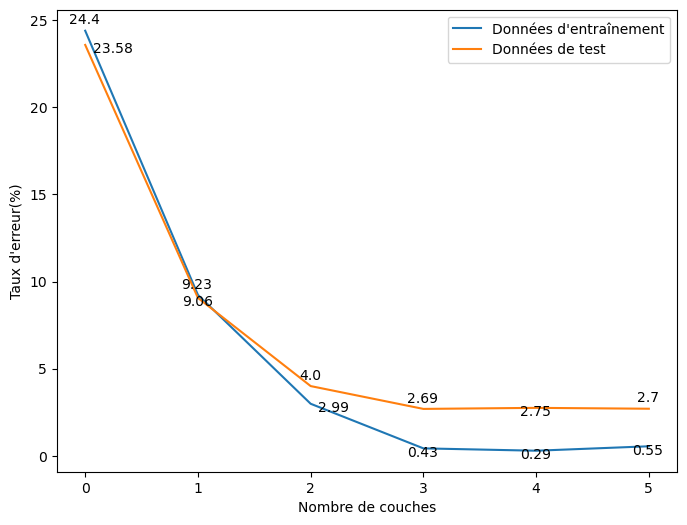

In [232]:
plt.figure(figsize=(8,6))
plt.plot(nombre_couches, train_erreurs_0, label="Données d'entraînement")
plt.plot(nombre_couches, test_erreurs_0, label="Données de test")
plt.legend()
annotations = []
for x, y in zip(nombre_couches, train_erreurs_0):
    annotations.append(plt.annotate(text=round(y,2), xy=(x, y)))
for x, y in zip(nombre_couches, test_erreurs_0):
    annotations.append(plt.annotate(text=round(y,2), xy=(x, y)))
adjust_text(annotations)
plt.xlabel('Nombre de couches')
plt.ylabel("Taux d'erreur(%)")
plt.savefig('figures/MNIST_couches_scratch.jpg')
plt.show()

In [206]:
train_erreurs_1 = []
test_erreurs_1 = []
c = 0
for p in P:

    print(f"Réseau à {c} couches")
    c += 1
    
    # Initialisation aléatoire du DNN
    dnn_pr = DNN(p) 

    print(f"Pré-entraînement du DBN")
    # Pré-entraînement du DNN grâce au DBN
    dnn_pr.pretrain(x_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_pretrain)
    
    print(f"Rétropropagation du DNN")
    # Rétropropagation du DNN pré-entraîné
    losses = dnn_pr.retropropagation(x_train, y_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_backprop)

    erreur_train, _ = dnn_pr.test(x_train, y_train)
    erreur_test, _ = dnn_pr.test(x_test, y_test)

    train_erreurs_1.append(erreur_train*100)
    test_erreurs_1.append(erreur_test*100)

Réseau à 0 couches
Pré-entraînement du DBN
Rétropropagation du DNN
Epoch 1/10, Erreur : 30.74 %, Loss: 2.269
Epoch 2/10, Erreur : 28.94 %, Loss: 2.203
Epoch 3/10, Erreur : 27.84 %, Loss: 2.142
Epoch 4/10, Erreur : 27.07 %, Loss: 2.083
Epoch 5/10, Erreur : 26.5 %, Loss: 2.027
Epoch 6/10, Erreur : 26.02 %, Loss: 1.974
Epoch 7/10, Erreur : 25.58 %, Loss: 1.923
Epoch 8/10, Erreur : 25.18 %, Loss: 1.875
Epoch 9/10, Erreur : 24.81 %, Loss: 1.829
Epoch 10/10, Erreur : 24.44 %, Loss: 1.785
Réseau à 1 couches
Pré-entraînement du DBN


100%|██████████| 5/5 [02:54<00:00, 34.81s/it]


Rétropropagation du DNN
Epoch 1/10, Erreur : 13.44 %, Loss: 1.046
Epoch 2/10, Erreur : 11.42 %, Loss: 0.465
Epoch 3/10, Erreur : 10.45 %, Loss: 0.393
Epoch 4/10, Erreur : 9.73 %, Loss: 0.358
Epoch 5/10, Erreur : 9.32 %, Loss: 0.335
Epoch 6/10, Erreur : 8.84 %, Loss: 0.318
Epoch 7/10, Erreur : 8.52 %, Loss: 0.304
Epoch 8/10, Erreur : 8.16 %, Loss: 0.292
Epoch 9/10, Erreur : 7.87 %, Loss: 0.281
Epoch 10/10, Erreur : 7.59 %, Loss: 0.271
Réseau à 2 couches
Pré-entraînement du DBN


100%|██████████| 5/5 [00:54<00:00, 10.96s/it]


Rétropropagation du DNN
Epoch 1/10, Erreur : 6.31 %, Loss: 0.356
Epoch 2/10, Erreur : 4.6 %, Loss: 0.186
Epoch 3/10, Erreur : 3.78 %, Loss: 0.145
Epoch 4/10, Erreur : 3.07 %, Loss: 0.121
Epoch 5/10, Erreur : 2.89 %, Loss: 0.105
Epoch 6/10, Erreur : 2.51 %, Loss: 0.094
Epoch 7/10, Erreur : 2.21 %, Loss: 0.085
Epoch 8/10, Erreur : 2.11 %, Loss: 0.077
Epoch 9/10, Erreur : 1.85 %, Loss: 0.071
Epoch 10/10, Erreur : 1.84 %, Loss: 0.065
Réseau à 3 couches
Pré-entraînement du DBN


100%|██████████| 5/5 [00:49<00:00,  9.80s/it]


Rétropropagation du DNN
Epoch 1/10, Erreur : 3.89 %, Loss: 0.219
Epoch 2/10, Erreur : 2.67 %, Loss: 0.113
Epoch 3/10, Erreur : 2.02 %, Loss: 0.084
Epoch 4/10, Erreur : 1.61 %, Loss: 0.065
Epoch 5/10, Erreur : 1.27 %, Loss: 0.053
Epoch 6/10, Erreur : 0.87 %, Loss: 0.043
Epoch 7/10, Erreur : 0.71 %, Loss: 0.036
Epoch 8/10, Erreur : 0.57 %, Loss: 0.03
Epoch 9/10, Erreur : 0.52 %, Loss: 0.024
Epoch 10/10, Erreur : 0.55 %, Loss: 0.02
Réseau à 4 couches
Pré-entraînement du DBN


100%|██████████| 5/5 [00:48<00:00,  9.78s/it]


Rétropropagation du DNN
Epoch 1/10, Erreur : 3.35 %, Loss: 0.227
Epoch 2/10, Erreur : 2.23 %, Loss: 0.102
Epoch 3/10, Erreur : 1.38 %, Loss: 0.07
Epoch 4/10, Erreur : 1.3 %, Loss: 0.05
Epoch 5/10, Erreur : 0.75 %, Loss: 0.036
Epoch 6/10, Erreur : 0.6 %, Loss: 0.027
Epoch 7/10, Erreur : 0.38 %, Loss: 0.018
Epoch 8/10, Erreur : 0.48 %, Loss: 0.013
Epoch 9/10, Erreur : 0.12 %, Loss: 0.01
Epoch 10/10, Erreur : 0.08 %, Loss: 0.005
Réseau à 5 couches
Pré-entraînement du DBN


100%|██████████| 5/5 [00:49<00:00,  9.86s/it]


Rétropropagation du DNN
Epoch 1/10, Erreur : 3.35 %, Loss: 0.302
Epoch 2/10, Erreur : 2.37 %, Loss: 0.109
Epoch 3/10, Erreur : 1.54 %, Loss: 0.073
Epoch 4/10, Erreur : 1.03 %, Loss: 0.05
Epoch 5/10, Erreur : 0.89 %, Loss: 0.036
Epoch 6/10, Erreur : 0.97 %, Loss: 0.026
Epoch 7/10, Erreur : 0.34 %, Loss: 0.018
Epoch 8/10, Erreur : 0.27 %, Loss: 0.013
Epoch 9/10, Erreur : 0.13 %, Loss: 0.008
Epoch 10/10, Erreur : 0.06 %, Loss: 0.004


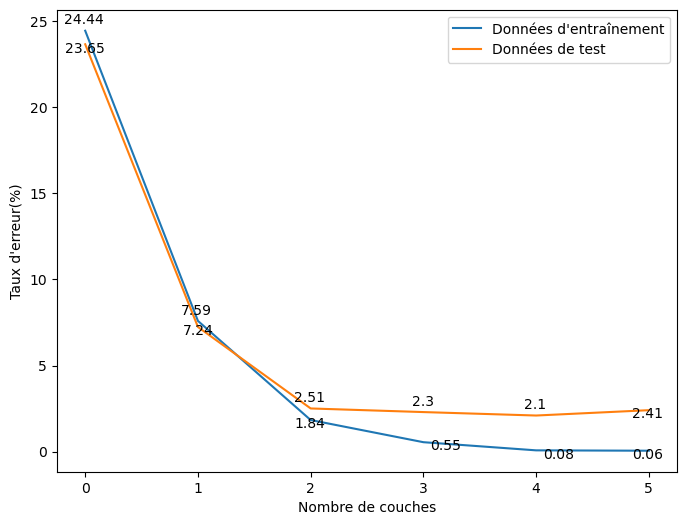

In [233]:
plt.figure(figsize=(8,6))
plt.plot(nombre_couches, train_erreurs_1, label="Données d'entraînement")
plt.plot(nombre_couches, test_erreurs_1, label="Données de test")
plt.legend()
annotations = []
for x, y in zip(nombre_couches, train_erreurs_1):
    annotations.append(plt.annotate(text=round(y,2), xy=(x, y)))
for x, y in zip(nombre_couches, test_erreurs_1):
    annotations.append(plt.annotate(text=round(y,2), xy=(x, y)))
adjust_text(annotations)
plt.xlabel('Nombre de couches')
plt.ylabel("Taux d'erreur(%)")
plt.savefig('figures/MNIST_couches_pre.jpg')
plt.show()

## 2.2 - En fonction du nombre de neurones par couche

In [210]:
# Paramètres

nombre_neurones = [20, 50, 100, 200, 300, 500, 1000]
P = [[784,n,n,10] for n in nombre_neurones]

learning_rate = 0.001
len_batch = 10
n_epochs_backprop = 10
n_epochs_pretrain = 5


In [211]:
train_erreurs_2 = []
test_erreurs_2 = []
for p in P:

    print(f"Réseau à {p[1]} neurones par couche")

    # Initialisation aléatoire du DNN
    dnn = DNN(p)
    
    # Rétropropagation du DNN intialisé aléatoirement
    losses = dnn.retropropagation(x_train, y_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_backprop)

    erreur_train, _ = dnn.test(x_train, y_train)
    erreur_test, _ = dnn.test(x_test, y_test)

    train_erreurs_2.append(erreur_train*100)
    test_erreurs_2.append(erreur_test*100)

Réseau à 20 neurones par couche
Epoch 1/10, Erreur : 89.66 %, Loss: 2.296
Epoch 2/10, Erreur : 24.26 %, Loss: 1.474
Epoch 3/10, Erreur : 13.56 %, Loss: 0.566
Epoch 4/10, Erreur : 11.36 %, Loss: 0.418
Epoch 5/10, Erreur : 9.36 %, Loss: 0.353
Epoch 6/10, Erreur : 8.33 %, Loss: 0.307
Epoch 7/10, Erreur : 7.26 %, Loss: 0.271
Epoch 8/10, Erreur : 6.37 %, Loss: 0.241
Epoch 9/10, Erreur : 6.05 %, Loss: 0.22
Epoch 10/10, Erreur : 5.82 %, Loss: 0.205
Réseau à 50 neurones par couche
Epoch 1/10, Erreur : 27.77 %, Loss: 1.96
Epoch 2/10, Erreur : 12.83 %, Loss: 0.585
Epoch 3/10, Erreur : 10.25 %, Loss: 0.398
Epoch 4/10, Erreur : 8.78 %, Loss: 0.327
Epoch 5/10, Erreur : 7.44 %, Loss: 0.281
Epoch 6/10, Erreur : 6.37 %, Loss: 0.244
Epoch 7/10, Erreur : 5.86 %, Loss: 0.214
Epoch 8/10, Erreur : 5.03 %, Loss: 0.191
Epoch 9/10, Erreur : 4.57 %, Loss: 0.172
Epoch 10/10, Erreur : 4.09 %, Loss: 0.156
Réseau à 100 neurones par couche
Epoch 1/10, Erreur : 17.21 %, Loss: 1.621
Epoch 2/10, Erreur : 10.67 %, Loss

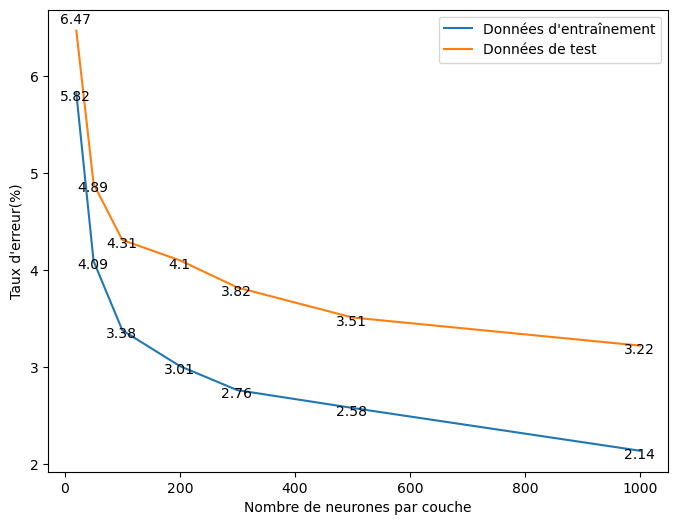

In [234]:
plt.figure(figsize=(8,6))
plt.plot(nombre_neurones, train_erreurs_2, label="Données d'entraînement")
plt.plot(nombre_neurones, test_erreurs_2, label="Données de test")
plt.legend()
annotations = []
for x, y in zip(nombre_neurones, train_erreurs_2):
    annotations.append(plt.annotate(text=round(y,2), xy=(x, y)))
for x, y in zip(nombre_neurones, test_erreurs_2):
    annotations.append(plt.annotate(text=round(y,2), xy=(x, y)))
adjust_text(annotations)
plt.xlabel('Nombre de neurones par couche')
plt.ylabel("Taux d'erreur(%)")
plt.savefig('figures/MNIST_neurones_scratch.jpg')
plt.show()

In [213]:
train_erreurs_3 = []
test_erreurs_3 = []
for p in P:

    print(f"Réseau à {p[1]} neurones par couche")
    
    # Initialisation aléatoire du DNN
    dnn_pr = DNN(p) 

    print(f"Pré-entraînement du DBN")
    # Pré-entraînement du DNN grâce au DBN
    dnn_pr.pretrain(x_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_pretrain)
    
    print(f"Rétropropagation du DNN")
    # Rétropropagation du DNN pré-entraîné
    losses = dnn_pr.retropropagation(x_train, y_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_backprop)

    erreur_train, _ = dnn_pr.test(x_train, y_train)
    erreur_test, _ = dnn_pr.test(x_test, y_test)

    train_erreurs_3.append(erreur_train*100)
    test_erreurs_3.append(erreur_test*100)

Réseau à 20 neurones par couche
Pré-entraînement du DBN


100%|██████████| 5/5 [00:06<00:00,  1.23s/it]


Rétropropagation du DNN
Epoch 1/10, Erreur : 12.26 %, Loss: 0.589
Epoch 2/10, Erreur : 9.08 %, Loss: 0.337
Epoch 3/10, Erreur : 8.33 %, Loss: 0.288
Epoch 4/10, Erreur : 7.24 %, Loss: 0.26
Epoch 5/10, Erreur : 7.19 %, Loss: 0.242
Epoch 6/10, Erreur : 6.67 %, Loss: 0.227
Epoch 7/10, Erreur : 6.17 %, Loss: 0.215
Epoch 8/10, Erreur : 6.1 %, Loss: 0.205
Epoch 9/10, Erreur : 5.94 %, Loss: 0.198
Epoch 10/10, Erreur : 5.63 %, Loss: 0.19
Réseau à 50 neurones par couche
Pré-entraînement du DBN


100%|██████████| 5/5 [00:09<00:00,  1.86s/it]


Rétropropagation du DNN
Epoch 1/10, Erreur : 8.3 %, Loss: 0.425
Epoch 2/10, Erreur : 6.57 %, Loss: 0.239
Epoch 3/10, Erreur : 5.4 %, Loss: 0.196
Epoch 4/10, Erreur : 4.69 %, Loss: 0.172
Epoch 5/10, Erreur : 4.33 %, Loss: 0.155
Epoch 6/10, Erreur : 4.15 %, Loss: 0.142
Epoch 7/10, Erreur : 3.74 %, Loss: 0.133
Epoch 8/10, Erreur : 3.44 %, Loss: 0.125
Epoch 9/10, Erreur : 3.31 %, Loss: 0.118
Epoch 10/10, Erreur : 3.09 %, Loss: 0.111
Réseau à 100 neurones par couche
Pré-entraînement du DBN


100%|██████████| 5/5 [00:11<00:00,  2.26s/it]


Rétropropagation du DNN
Epoch 1/10, Erreur : 6.88 %, Loss: 0.38
Epoch 2/10, Erreur : 5.23 %, Loss: 0.208
Epoch 3/10, Erreur : 4.23 %, Loss: 0.165
Epoch 4/10, Erreur : 3.83 %, Loss: 0.14
Epoch 5/10, Erreur : 3.47 %, Loss: 0.123
Epoch 6/10, Erreur : 3.1 %, Loss: 0.111
Epoch 7/10, Erreur : 2.64 %, Loss: 0.101
Epoch 8/10, Erreur : 2.62 %, Loss: 0.093
Epoch 9/10, Erreur : 2.31 %, Loss: 0.086
Epoch 10/10, Erreur : 2.11 %, Loss: 0.081
Réseau à 200 neurones par couche
Pré-entraînement du DBN


100%|██████████| 5/5 [01:22<00:00, 16.51s/it]


Rétropropagation du DNN
Epoch 1/10, Erreur : 6.35 %, Loss: 0.353
Epoch 2/10, Erreur : 4.57 %, Loss: 0.183
Epoch 3/10, Erreur : 3.7 %, Loss: 0.142
Epoch 4/10, Erreur : 3.12 %, Loss: 0.119
Epoch 5/10, Erreur : 2.75 %, Loss: 0.104
Epoch 6/10, Erreur : 2.54 %, Loss: 0.092
Epoch 7/10, Erreur : 2.2 %, Loss: 0.083
Epoch 8/10, Erreur : 2.18 %, Loss: 0.076
Epoch 9/10, Erreur : 1.86 %, Loss: 0.069
Epoch 10/10, Erreur : 1.62 %, Loss: 0.064
Réseau à 300 neurones par couche
Pré-entraînement du DBN


100%|██████████| 5/5 [01:40<00:00, 20.17s/it]


Rétropropagation du DNN
Epoch 1/10, Erreur : 5.85 %, Loss: 0.341
Epoch 2/10, Erreur : 4.12 %, Loss: 0.168
Epoch 3/10, Erreur : 3.32 %, Loss: 0.131
Epoch 4/10, Erreur : 2.79 %, Loss: 0.109
Epoch 5/10, Erreur : 2.36 %, Loss: 0.095
Epoch 6/10, Erreur : 2.13 %, Loss: 0.083
Epoch 7/10, Erreur : 1.92 %, Loss: 0.075
Epoch 8/10, Erreur : 1.92 %, Loss: 0.068
Epoch 9/10, Erreur : 1.56 %, Loss: 0.062
Epoch 10/10, Erreur : 1.44 %, Loss: 0.058
Réseau à 500 neurones par couche
Pré-entraînement du DBN


100%|██████████| 5/5 [04:55<00:00, 59.12s/it]


Rétropropagation du DNN
Epoch 1/10, Erreur : 5.58 %, Loss: 0.338
Epoch 2/10, Erreur : 3.88 %, Loss: 0.163
Epoch 3/10, Erreur : 3.05 %, Loss: 0.125
Epoch 4/10, Erreur : 2.58 %, Loss: 0.104
Epoch 5/10, Erreur : 2.31 %, Loss: 0.089
Epoch 6/10, Erreur : 1.97 %, Loss: 0.079
Epoch 7/10, Erreur : 1.85 %, Loss: 0.071
Epoch 8/10, Erreur : 1.61 %, Loss: 0.064
Epoch 9/10, Erreur : 1.45 %, Loss: 0.059
Epoch 10/10, Erreur : 1.4 %, Loss: 0.054
Réseau à 1000 neurones par couche
Pré-entraînement du DBN


100%|██████████| 5/5 [09:56<00:00, 119.26s/it]


Rétropropagation du DNN
Epoch 1/10, Erreur : 5.52 %, Loss: 0.335
Epoch 2/10, Erreur : 3.98 %, Loss: 0.168
Epoch 3/10, Erreur : 3.28 %, Loss: 0.129
Epoch 4/10, Erreur : 2.71 %, Loss: 0.108
Epoch 5/10, Erreur : 2.41 %, Loss: 0.093
Epoch 6/10, Erreur : 2.07 %, Loss: 0.082
Epoch 7/10, Erreur : 1.86 %, Loss: 0.073
Epoch 8/10, Erreur : 1.63 %, Loss: 0.066
Epoch 9/10, Erreur : 1.49 %, Loss: 0.06
Epoch 10/10, Erreur : 1.37 %, Loss: 0.055


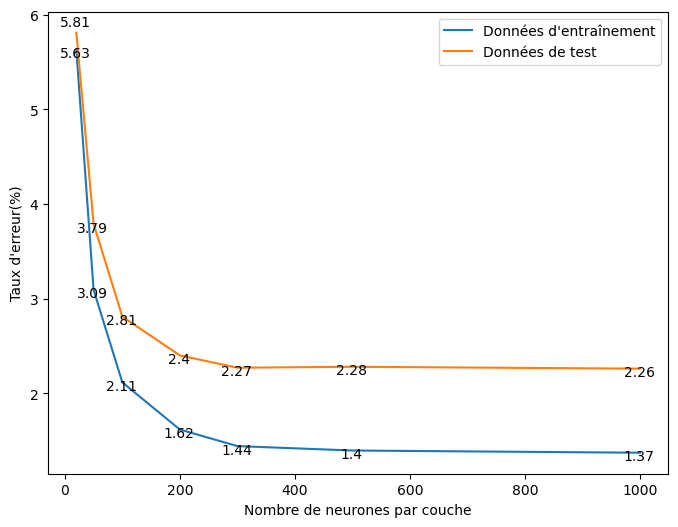

In [235]:
plt.figure(figsize=(8,6))
plt.plot(nombre_neurones, train_erreurs_3, label="Données d'entraînement")
plt.plot(nombre_neurones, test_erreurs_3, label="Données de test")
plt.legend()
annotations = []
for x, y in zip(nombre_neurones, train_erreurs_3):
    annotations.append(plt.annotate(text=round(y,2), xy=(x, y)))
for x, y in zip(nombre_neurones, test_erreurs_3):
    annotations.append(plt.annotate(text=round(y,2), xy=(x, y)))
adjust_text(annotations)
plt.xlabel('Nombre de neurones par couche')
plt.ylabel("Taux d'erreur(%)")
plt.savefig('figures/MNIST_neurones_pre.jpg')
plt.show()

## 2.3 - En fonction du nombre de données d'entraînement

In [215]:
# Paramètres

p = [784, 200, 200, 10]

learning_rate = 0.001
len_batch = 10
n_epochs_backprop = 10
n_epochs_pretrain = 5

nombre_données = [100, 500, 1000, 5000, 10000, 20000, 40000, 60000]

In [219]:
train_erreurs_4 = []
test_erreurs_4 = []
for n in nombre_données:
    x_TRAIN, y_TRAIN = x_train[:n], y_train[:n]
    print(f"Réseau entraîné avec {n} données d'entraînement ")

    # Initialisation aléatoire du DNN
    dnn = DNN(p)
    
    # Rétropropagation du DNN intialisé aléatoirement
    losses = dnn.retropropagation(x_TRAIN, y_TRAIN, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_backprop)

    erreur_train, _ = dnn.test(x_TRAIN, y_TRAIN)
    erreur_test, _ = dnn.test(x_test, y_test)

    train_erreurs_4.append(erreur_train*100)
    test_erreurs_4.append(erreur_test*100)

Réseau entraîné avec 100 données d'entraînement 
Epoch 1/10, Erreur : 89.0 %, Loss: 2.301
Epoch 2/10, Erreur : 87.0 %, Loss: 2.301
Epoch 3/10, Erreur : 83.0 %, Loss: 2.3
Epoch 4/10, Erreur : 79.0 %, Loss: 2.3
Epoch 5/10, Erreur : 76.0 %, Loss: 2.299
Epoch 6/10, Erreur : 72.0 %, Loss: 2.299
Epoch 7/10, Erreur : 71.0 %, Loss: 2.298
Epoch 8/10, Erreur : 72.0 %, Loss: 2.298
Epoch 9/10, Erreur : 71.0 %, Loss: 2.297
Epoch 10/10, Erreur : 70.0 %, Loss: 2.296
Réseau entraîné avec 500 données d'entraînement 
Epoch 1/10, Erreur : 89.8 %, Loss: 2.302
Epoch 2/10, Erreur : 89.4 %, Loss: 2.3
Epoch 3/10, Erreur : 89.2 %, Loss: 2.299
Epoch 4/10, Erreur : 88.6 %, Loss: 2.298
Epoch 5/10, Erreur : 87.0 %, Loss: 2.296
Epoch 6/10, Erreur : 86.0 %, Loss: 2.294
Epoch 7/10, Erreur : 85.6 %, Loss: 2.292
Epoch 8/10, Erreur : 85.0 %, Loss: 2.29
Epoch 9/10, Erreur : 83.4 %, Loss: 2.288
Epoch 10/10, Erreur : 83.0 %, Loss: 2.285
Réseau entraîné avec 1000 données d'entraînement 
Epoch 1/10, Erreur : 80.5 %, Loss: 2.

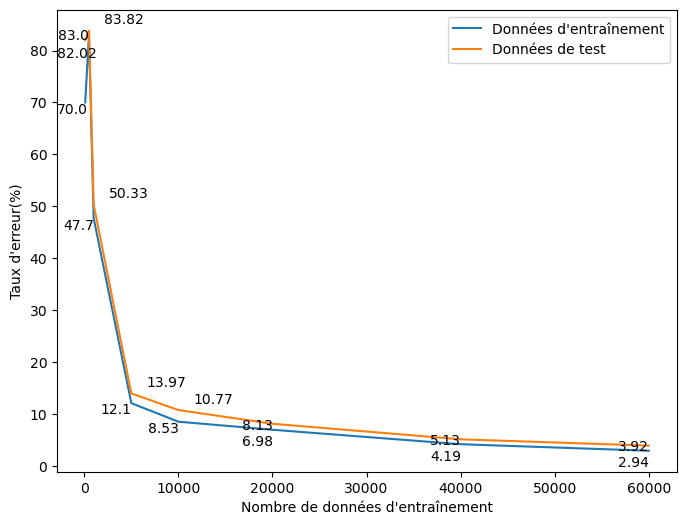

In [236]:
plt.figure(figsize=(8,6))
plt.plot(nombre_données, train_erreurs_4, label="Données d'entraînement")
plt.plot(nombre_données, test_erreurs_4, label="Données de test")
plt.legend()
annotations = []
for x, y in zip(nombre_données, train_erreurs_4):
    annotations.append(plt.annotate(text=round(y,2), xy=(x, y)))
for x, y in zip(nombre_données, test_erreurs_4):
    annotations.append(plt.annotate(text=round(y,2), xy=(x, y)))
adjust_text(annotations)
plt.xlabel("Nombre de données d'entraînement")
plt.ylabel("Taux d'erreur(%)")
plt.savefig('figures/MNIST_donnees_scratch.jpg')
plt.show()

In [221]:
train_erreurs_5 = []
test_erreurs_5 = []
for n in nombre_données:
    x_TRAIN, y_TRAIN = x_train[:n], y_train[:n]
    print(f"Réseau entraîné avec {n} données d'entraînement ")
    
    # Initialisation aléatoire du DNN
    dnn_pr = DNN(p) 

    print(f"Pré-entraînement du DBN")
    # Pré-entraînement du DNN grâce au DBN
    dnn_pr.pretrain(x_TRAIN, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_pretrain)
    
    print(f"Rétropropagation du DNN")
    # Rétropropagation du DNN pré-entraîné
    losses = dnn_pr.retropropagation(x_TRAIN, y_TRAIN, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_backprop)

    erreur_train, _ = dnn_pr.test(x_TRAIN, y_TRAIN)
    erreur_test, _ = dnn_pr.test(x_test, y_test)

    train_erreurs_5.append(erreur_train*100)
    test_erreurs_5.append(erreur_test*100)

Réseau entraîné avec 100 données d'entraînement 
Pré-entraînement du DBN


100%|██████████| 5/5 [00:00<00:00, 55.32it/s]


Rétropropagation du DNN
Epoch 1/10, Erreur : 86.0 %, Loss: 2.302
Epoch 2/10, Erreur : 87.0 %, Loss: 2.301
Epoch 3/10, Erreur : 85.0 %, Loss: 2.3
Epoch 4/10, Erreur : 84.0 %, Loss: 2.3
Epoch 5/10, Erreur : 83.0 %, Loss: 2.299
Epoch 6/10, Erreur : 79.0 %, Loss: 2.298
Epoch 7/10, Erreur : 79.0 %, Loss: 2.297
Epoch 8/10, Erreur : 78.0 %, Loss: 2.296
Epoch 9/10, Erreur : 75.0 %, Loss: 2.296
Epoch 10/10, Erreur : 74.0 %, Loss: 2.295
Réseau entraîné avec 500 données d'entraînement 
Pré-entraînement du DBN


100%|██████████| 5/5 [00:00<00:00, 11.71it/s]


Rétropropagation du DNN
Epoch 1/10, Erreur : 80.0 %, Loss: 2.297
Epoch 2/10, Erreur : 68.6 %, Loss: 2.283
Epoch 3/10, Erreur : 63.0 %, Loss: 2.267
Epoch 4/10, Erreur : 62.8 %, Loss: 2.247
Epoch 5/10, Erreur : 64.0 %, Loss: 2.222
Epoch 6/10, Erreur : 63.4 %, Loss: 2.188
Epoch 7/10, Erreur : 64.6 %, Loss: 2.143
Epoch 8/10, Erreur : 64.6 %, Loss: 2.084
Epoch 9/10, Erreur : 63.4 %, Loss: 2.009
Epoch 10/10, Erreur : 60.8 %, Loss: 1.921
Réseau entraîné avec 1000 données d'entraînement 
Pré-entraînement du DBN


100%|██████████| 5/5 [00:00<00:00,  6.54it/s]


Rétropropagation du DNN
Epoch 1/10, Erreur : 53.3 %, Loss: 2.274
Epoch 2/10, Erreur : 49.2 %, Loss: 2.202
Epoch 3/10, Erreur : 50.7 %, Loss: 2.081
Epoch 4/10, Erreur : 49.1 %, Loss: 1.877
Epoch 5/10, Erreur : 41.5 %, Loss: 1.613
Epoch 6/10, Erreur : 32.9 %, Loss: 1.362
Epoch 7/10, Erreur : 28.6 %, Loss: 1.168
Epoch 8/10, Erreur : 27.2 %, Loss: 1.034
Epoch 9/10, Erreur : 25.4 %, Loss: 0.939
Epoch 10/10, Erreur : 24.5 %, Loss: 0.87
Réseau entraîné avec 5000 données d'entraînement 
Pré-entraînement du DBN


100%|██████████| 5/5 [00:06<00:00,  1.31s/it]


Rétropropagation du DNN
Epoch 1/10, Erreur : 20.76 %, Loss: 1.596
Epoch 2/10, Erreur : 14.2 %, Loss: 0.62
Epoch 3/10, Erreur : 12.76 %, Loss: 0.471
Epoch 4/10, Erreur : 11.38 %, Loss: 0.411
Epoch 5/10, Erreur : 9.92 %, Loss: 0.375
Epoch 6/10, Erreur : 9.04 %, Loss: 0.345
Epoch 7/10, Erreur : 8.76 %, Loss: 0.322
Epoch 8/10, Erreur : 7.82 %, Loss: 0.299
Epoch 9/10, Erreur : 7.52 %, Loss: 0.281
Epoch 10/10, Erreur : 6.92 %, Loss: 0.266
Réseau entraîné avec 10000 données d'entraînement 
Pré-entraînement du DBN


100%|██████████| 5/5 [00:19<00:00,  3.89s/it]


Rétropropagation du DNN
Epoch 1/10, Erreur : 12.51 %, Loss: 0.984
Epoch 2/10, Erreur : 10.17 %, Loss: 0.396
Epoch 3/10, Erreur : 8.91 %, Loss: 0.335
Epoch 4/10, Erreur : 7.92 %, Loss: 0.299
Epoch 5/10, Erreur : 7.31 %, Loss: 0.271
Epoch 6/10, Erreur : 6.46 %, Loss: 0.249
Epoch 7/10, Erreur : 6.27 %, Loss: 0.23
Epoch 8/10, Erreur : 5.73 %, Loss: 0.215
Epoch 9/10, Erreur : 5.52 %, Loss: 0.201
Epoch 10/10, Erreur : 5.03 %, Loss: 0.189
Réseau entraîné avec 20000 données d'entraînement 
Pré-entraînement du DBN


100%|██████████| 5/5 [00:30<00:00,  6.08s/it]


Rétropropagation du DNN
Epoch 1/10, Erreur : 9.6 %, Loss: 0.64
Epoch 2/10, Erreur : 7.7 %, Loss: 0.302
Epoch 3/10, Erreur : 6.46 %, Loss: 0.25
Epoch 4/10, Erreur : 5.68 %, Loss: 0.217
Epoch 5/10, Erreur : 5.07 %, Loss: 0.192
Epoch 6/10, Erreur : 4.6 %, Loss: 0.173
Epoch 7/10, Erreur : 4.06 %, Loss: 0.157
Epoch 8/10, Erreur : 3.94 %, Loss: 0.144
Epoch 9/10, Erreur : 3.74 %, Loss: 0.134
Epoch 10/10, Erreur : 3.36 %, Loss: 0.124
Réseau entraîné avec 40000 données d'entraînement 
Pré-entraînement du DBN


100%|██████████| 5/5 [00:45<00:00,  9.19s/it]


Rétropropagation du DNN
Epoch 1/10, Erreur : 7.7 %, Loss: 0.436
Epoch 2/10, Erreur : 5.53 %, Loss: 0.227
Epoch 3/10, Erreur : 4.57 %, Loss: 0.179
Epoch 4/10, Erreur : 3.95 %, Loss: 0.149
Epoch 5/10, Erreur : 3.45 %, Loss: 0.13
Epoch 6/10, Erreur : 2.98 %, Loss: 0.114
Epoch 7/10, Erreur : 2.59 %, Loss: 0.102
Epoch 8/10, Erreur : 2.47 %, Loss: 0.093
Epoch 9/10, Erreur : 2.22 %, Loss: 0.085
Epoch 10/10, Erreur : 2.03 %, Loss: 0.078
Réseau entraîné avec 60000 données d'entraînement 
Pré-entraînement du DBN


100%|██████████| 5/5 [01:02<00:00, 12.44s/it]


Rétropropagation du DNN
Epoch 1/10, Erreur : 6.05 %, Loss: 0.356
Epoch 2/10, Erreur : 4.49 %, Loss: 0.181
Epoch 3/10, Erreur : 3.64 %, Loss: 0.141
Epoch 4/10, Erreur : 3.03 %, Loss: 0.119
Epoch 5/10, Erreur : 2.72 %, Loss: 0.104
Epoch 6/10, Erreur : 2.53 %, Loss: 0.092
Epoch 7/10, Erreur : 2.14 %, Loss: 0.083
Epoch 8/10, Erreur : 2.02 %, Loss: 0.075
Epoch 9/10, Erreur : 1.87 %, Loss: 0.069
Epoch 10/10, Erreur : 1.6 %, Loss: 0.064


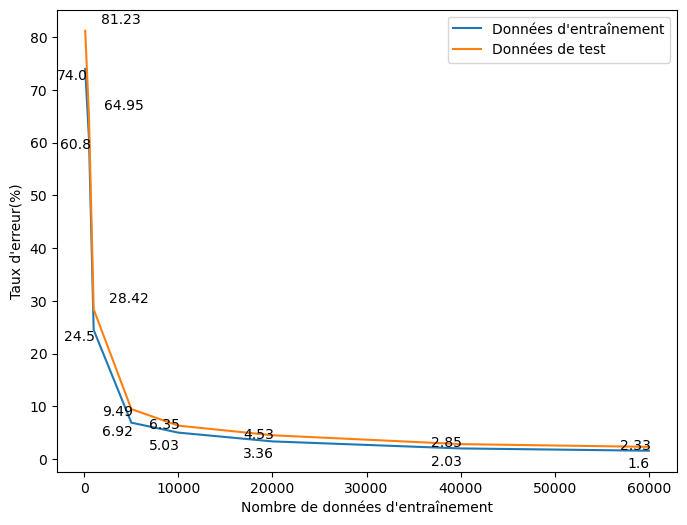

In [237]:
plt.figure(figsize=(8,6))
plt.plot(nombre_données, train_erreurs_5, label="Données d'entraînement")
plt.plot(nombre_données, test_erreurs_5, label="Données de test")
plt.legend()
annotations = []
for x, y in zip(nombre_données, train_erreurs_5):
    annotations.append(plt.annotate(text=round(y,2), xy=(x, y)))
for x, y in zip(nombre_données, test_erreurs_5):
    annotations.append(plt.annotate(text=round(y,2), xy=(x, y)))
adjust_text(annotations)
plt.xlabel("Nombre de données d'entraînement")
plt.ylabel("Taux d'erreur(%)")
plt.savefig('figures/MNIST_donnees_pre.jpg')
plt.show()

## 2.4 - Obtenir le meilleur taux de classification possible

### 2.4.1 - La meilleure solution trouvée

In [ ]:
p = [784, 400, 400, 400, 400, 10]

learning_rate = 0.001
len_batch = 5
n_epochs_backprop = 8
n_epochs_pretrain = 5

In [ ]:
# Initialisation aléatoire du DNN
dnn_pr = DNN(p) 

print(f"Pré-entraînement du DBN")
# Pré-entraînement du DNN grâce au DBN
dnn_pr.pretrain(x_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_pretrain)

print(f"Rétropropagation du DNN")
# Rétropropagation du DNN pré-entraîné
losses = dnn_pr.retropropagation(x_train, y_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_backprop)

erreur_train, _ = dnn_pr.test(x_train, y_train)
erreur_test, _ = dnn_pr.test(x_test, y_test)

Pré-entraînement du DBN


100%|██████████| 5/5 [03:52<00:00, 46.51s/it]


Rétropropagation du DNN
Epoch 1/8, Erreur : 2.43 %, Loss: 0.18
Epoch 2/8, Erreur : 1.15 %, Loss: 0.068
Epoch 3/8, Erreur : 0.73 %, Loss: 0.038
Epoch 4/8, Erreur : 0.28 %, Loss: 0.021
Epoch 5/8, Erreur : 0.23 %, Loss: 0.013
Epoch 6/8, Erreur : 0.08 %, Loss: 0.007
Epoch 7/8, Erreur : 0.06 %, Loss: 0.005
Epoch 8/8, Erreur : 0.0 %, Loss: 0.002


In [ ]:
print(f"Taux d'erreur sur le set d'entraînement : {round(erreur_train*100,2)} %")
print(f"Taux d'erreur sur le set de test : {round(erreur_test*100,2)} %")

Taux d'erreur sur le set d'entraînement : 0.0 %
Taux d'erreur sur le set de test : 1.65 %


### 2.4.2 - Toutes les solutions n'ayant pas abouti

In [275]:
p = [784, 400, 400, 400, 400, 10]

learning_rate = 0.001
len_batch = 10
n_epochs_backprop = 10
n_epochs_pretrain = 5

In [276]:
# Initialisation aléatoire du DNN
dnn_pr = DNN(p) 

print(f"Pré-entraînement du DBN")
# Pré-entraînement du DNN grâce au DBN
dnn_pr.pretrain(x_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_pretrain)

print(f"Rétropropagation du DNN")
# Rétropropagation du DNN pré-entraîné
losses = dnn_pr.retropropagation(x_train, y_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_backprop)

erreur_train, _ = dnn_pr.test(x_train, y_train)
erreur_test, _ = dnn_pr.test(x_test, y_test)

Pré-entraînement du DBN


100%|██████████| 5/5 [04:56<00:00, 59.36s/it]


Rétropropagation du DNN
Epoch 1/10, Erreur : 2.79 %, Loss: 0.198
Epoch 2/10, Erreur : 1.42 %, Loss: 0.083
Epoch 3/10, Erreur : 0.92 %, Loss: 0.052
Epoch 4/10, Erreur : 0.78 %, Loss: 0.034
Epoch 5/10, Erreur : 0.3 %, Loss: 0.022
Epoch 6/10, Erreur : 0.17 %, Loss: 0.014
Epoch 7/10, Erreur : 0.2 %, Loss: 0.008
Epoch 8/10, Erreur : 0.04 %, Loss: 0.005
Epoch 9/10, Erreur : 0.0 %, Loss: 0.003
Epoch 10/10, Erreur : 0.0 %, Loss: 0.001


In [277]:
print(f"Taux d'erreur sur le set d'entraînement : {round(erreur_train*100,2)} %")
print(f"Taux d'erreur sur le set de test : {round(erreur_test*100,2)} %")

Taux d'erreur sur le set d'entraînement : 0.0 %
Taux d'erreur sur le set de test : 1.81 %


In [278]:
p = [784, 600, 500, 400, 300, 10]

learning_rate = 0.001
len_batch = 10
n_epochs_backprop = 10
n_epochs_pretrain = 5

In [279]:
# Initialisation aléatoire du DNN
dnn_pr = DNN(p) 

print(f"Pré-entraînement du DBN")
# Pré-entraînement du DNN grâce au DBN
dnn_pr.pretrain(x_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_pretrain)

print(f"Rétropropagation du DNN")
# Rétropropagation du DNN pré-entraîné
losses = dnn_pr.retropropagation(x_train, y_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_backprop)

erreur_train, _ = dnn_pr.test(x_train, y_train)
erreur_test, _ = dnn_pr.test(x_test, y_test)

Pré-entraînement du DBN


100%|██████████| 5/5 [02:14<00:00, 26.95s/it]


Rétropropagation du DNN
Epoch 1/10, Erreur : 2.83 %, Loss: 0.205
Epoch 2/10, Erreur : 1.67 %, Loss: 0.086
Epoch 3/10, Erreur : 1.16 %, Loss: 0.052
Epoch 4/10, Erreur : 0.75 %, Loss: 0.034
Epoch 5/10, Erreur : 0.28 %, Loss: 0.022
Epoch 6/10, Erreur : 0.22 %, Loss: 0.013
Epoch 7/10, Erreur : 0.1 %, Loss: 0.008
Epoch 8/10, Erreur : 0.04 %, Loss: 0.005
Epoch 9/10, Erreur : 0.01 %, Loss: 0.003
Epoch 10/10, Erreur : 0.0 %, Loss: 0.002


In [280]:
print(f"Taux d'erreur sur le set d'entraînement : {round(erreur_train*100,2)} %")
print(f"Taux d'erreur sur le set de test : {round(erreur_test*100,2)} %")

Taux d'erreur sur le set d'entraînement : 0.0 %
Taux d'erreur sur le set de test : 1.91 %


In [281]:
p = [784, 400, 400, 400, 400, 10]

learning_rate = 0.005
len_batch = 32
n_epochs_backprop = 20
n_epochs_pretrain = 10

In [282]:
# Initialisation aléatoire du DNN
dnn_pr = DNN(p) 

print(f"Pré-entraînement du DBN")
# Pré-entraînement du DNN grâce au DBN
dnn_pr.pretrain(x_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_pretrain)

print(f"Rétropropagation du DNN")
# Rétropropagation du DNN pré-entraîné
losses = dnn_pr.retropropagation(x_train, y_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_backprop)

erreur_train, _ = dnn_pr.test(x_train, y_train)
erreur_test, _ = dnn_pr.test(x_test, y_test)

Pré-entraînement du DBN


100%|██████████| 10/10 [03:48<00:00, 22.86s/it]


Rétropropagation du DNN
Epoch 1/20, Erreur : 3.06 %, Loss: 0.321
Epoch 2/20, Erreur : 1.47 %, Loss: 0.094
Epoch 3/20, Erreur : 1.07 %, Loss: 0.051
Epoch 4/20, Erreur : 0.51 %, Loss: 0.029
Epoch 5/20, Erreur : 0.32 %, Loss: 0.016
Epoch 6/20, Erreur : 0.1 %, Loss: 0.009
Epoch 7/20, Erreur : 0.1 %, Loss: 0.006
Epoch 8/20, Erreur : 0.03 %, Loss: 0.003
Epoch 9/20, Erreur : 0.01 %, Loss: 0.002
Epoch 10/20, Erreur : 0.0 %, Loss: 0.001
Epoch 11/20, Erreur : 0.0 %, Loss: 0.0
Epoch 12/20, Erreur : 0.0 %, Loss: 0.0
Epoch 13/20, Erreur : 0.0 %, Loss: 0.0
Epoch 14/20, Erreur : 0.0 %, Loss: 0.0
Epoch 15/20, Erreur : 0.0 %, Loss: 0.0
Epoch 16/20, Erreur : 0.0 %, Loss: 0.0
Epoch 17/20, Erreur : 0.0 %, Loss: 0.0
Epoch 18/20, Erreur : 0.0 %, Loss: 0.0
Epoch 19/20, Erreur : 0.0 %, Loss: 0.0
Epoch 20/20, Erreur : 0.0 %, Loss: 0.0


In [283]:
print(f"Taux d'erreur sur le set d'entraînement : {round(erreur_train*100,2)} %")
print(f"Taux d'erreur sur le set de test : {round(erreur_test*100,2)} %")

Taux d'erreur sur le set d'entraînement : 0.0 %
Taux d'erreur sur le set de test : 1.88 %


In [289]:
p = [784, 400, 400, 400, 400, 10]

learning_rate = 0.005
len_batch = 32
n_epochs_backprop = 3
n_epochs_pretrain = 10

In [290]:
# Initialisation aléatoire du DNN
dnn_pr = DNN(p) 

print(f"Pré-entraînement du DBN")
# Pré-entraînement du DNN grâce au DBN
dnn_pr.pretrain(x_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_pretrain)

print(f"Rétropropagation du DNN")
# Rétropropagation du DNN pré-entraîné
losses = dnn_pr.retropropagation(x_train, y_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_backprop)

erreur_train, _ = dnn_pr.test(x_train, y_train)
erreur_test, _ = dnn_pr.test(x_test, y_test)

Pré-entraînement du DBN


100%|██████████| 10/10 [02:04<00:00, 12.49s/it]


Rétropropagation du DNN
Epoch 1/3, Erreur : 3.49 %, Loss: 0.359
Epoch 2/3, Erreur : 1.67 %, Loss: 0.098
Epoch 3/3, Erreur : 1.16 %, Loss: 0.053


In [291]:
print(f"Taux d'erreur sur le set d'entraînement : {round(erreur_train*100,2)} %")
print(f"Taux d'erreur sur le set de test : {round(erreur_test*100,2)} %")

Taux d'erreur sur le set d'entraînement : 1.16 %
Taux d'erreur sur le set de test : 3.16 %


In [292]:
# Rétropropagation du DNN pré-entraîné
losses = dnn_pr.retropropagation(x_train, y_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=3)

erreur_train, _ = dnn_pr.test(x_train, y_train)
erreur_test, _ = dnn_pr.test(x_test, y_test)

Epoch 1/3, Erreur : 0.62 %, Loss: 0.034
Epoch 2/3, Erreur : 0.34 %, Loss: 0.02
Epoch 3/3, Erreur : 0.22 %, Loss: 0.011


In [293]:
print(f"Taux d'erreur sur le set d'entraînement : {round(erreur_train*100,2)} %")
print(f"Taux d'erreur sur le set de test : {round(erreur_test*100,2)} %")

Taux d'erreur sur le set d'entraînement : 0.22 %
Taux d'erreur sur le set de test : 2.44 %


In [294]:
p = [784, 400, 400, 400, 400, 10]

learning_rate = 0.001
len_batch = 10
n_epochs_backprop = 8
n_epochs_pretrain = 5

In [295]:
# Initialisation aléatoire du DNN
dnn_pr = DNN(p) 

print(f"Pré-entraînement du DBN")
# Pré-entraînement du DNN grâce au DBN
dnn_pr.pretrain(x_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_pretrain)

print(f"Rétropropagation du DNN")
# Rétropropagation du DNN pré-entraîné
losses = dnn_pr.retropropagation(x_train, y_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_backprop)

erreur_train, _ = dnn_pr.test(x_train, y_train)
erreur_test, _ = dnn_pr.test(x_test, y_test)

Pré-entraînement du DBN


100%|██████████| 5/5 [04:26<00:00, 53.22s/it]


Rétropropagation du DNN
Epoch 1/8, Erreur : 2.85 %, Loss: 0.192
Epoch 2/8, Erreur : 1.61 %, Loss: 0.082
Epoch 3/8, Erreur : 0.98 %, Loss: 0.052
Epoch 4/8, Erreur : 0.55 %, Loss: 0.034
Epoch 5/8, Erreur : 0.37 %, Loss: 0.021
Epoch 6/8, Erreur : 0.18 %, Loss: 0.014
Epoch 7/8, Erreur : 0.16 %, Loss: 0.008
Epoch 8/8, Erreur : 0.07 %, Loss: 0.005


In [296]:
print(f"Taux d'erreur sur le set d'entraînement : {round(erreur_train*100,2)} %")
print(f"Taux d'erreur sur le set de test : {round(erreur_test*100,2)} %")

Taux d'erreur sur le set d'entraînement : 0.07 %
Taux d'erreur sur le set de test : 1.88 %


In [297]:
p = [784, 400, 400, 400, 400, 10]

learning_rate = 0.002
len_batch = 10
n_epochs_backprop = 8
n_epochs_pretrain = 5

In [298]:
# Initialisation aléatoire du DNN
dnn_pr = DNN(p) 

print(f"Pré-entraînement du DBN")
# Pré-entraînement du DNN grâce au DBN
dnn_pr.pretrain(x_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_pretrain)

print(f"Rétropropagation du DNN")
# Rétropropagation du DNN pré-entraîné
losses = dnn_pr.retropropagation(x_train, y_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_backprop)

erreur_train, _ = dnn_pr.test(x_train, y_train)
erreur_test, _ = dnn_pr.test(x_test, y_test)

Pré-entraînement du DBN


100%|██████████| 5/5 [04:24<00:00, 52.95s/it]


Rétropropagation du DNN
Epoch 1/8, Erreur : 2.36 %, Loss: 0.205
Epoch 2/8, Erreur : 1.26 %, Loss: 0.072
Epoch 3/8, Erreur : 0.83 %, Loss: 0.039
Epoch 4/8, Erreur : 0.4 %, Loss: 0.023
Epoch 5/8, Erreur : 0.17 %, Loss: 0.012
Epoch 6/8, Erreur : 0.04 %, Loss: 0.005
Epoch 7/8, Erreur : 0.02 %, Loss: 0.002
Epoch 8/8, Erreur : 0.03 %, Loss: 0.001


In [299]:
print(f"Taux d'erreur sur le set d'entraînement : {round(erreur_train*100,2)} %")
print(f"Taux d'erreur sur le set de test : {round(erreur_test*100,2)} %")

Taux d'erreur sur le set d'entraînement : 0.03 %
Taux d'erreur sur le set de test : 1.86 %


In [306]:
p = [784, 400, 400, 400, 400, 10]

learning_rate = 0.001
len_batch = 1
n_epochs_backprop = 5
n_epochs_pretrain = 5

In [307]:
# Initialisation aléatoire du DNN
dnn_pr = DNN(p) 

print(f"Pré-entraînement du DBN")
# Pré-entraînement du DNN grâce au DBN
dnn_pr.pretrain(x_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_pretrain)

print(f"Rétropropagation du DNN")
# Rétropropagation du DNN pré-entraîné
losses = dnn_pr.retropropagation(x_train, y_train, learning_rate=learning_rate, len_batch=len_batch, n_epochs=n_epochs_backprop)

erreur_train, _ = dnn_pr.test(x_train, y_train)
erreur_test, _ = dnn_pr.test(x_test, y_test)

Pré-entraînement du DBN


100%|██████████| 5/5 [18:58<00:00, 227.67s/it]


Rétropropagation du DNN
Epoch 1/5, Erreur : 3.16 %, Loss: 0.232
Epoch 2/5, Erreur : 2.51 %, Loss: 0.122
Epoch 3/5, Erreur : 2.02 %, Loss: 0.089
Epoch 4/5, Erreur : 1.38 %, Loss: 0.072
Epoch 5/5, Erreur : 1.9 %, Loss: 0.064


In [308]:
print(f"Taux d'erreur sur le set d'entraînement : {round(erreur_train*100,2)} %")
print(f"Taux d'erreur sur le set de test : {round(erreur_test*100,2)} %")

Taux d'erreur sur le set d'entraînement : 1.9 %
Taux d'erreur sur le set de test : 3.31 %
